In [6]:
from matplotlib import pyplot as plt
%matplotlib inline  

import math
import cv2
import numpy as np

In [24]:
def edgeDetectSobel(path):
    img = cv2.imread(f'{path}')

    # Convert to graycsale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)

    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

    # Sobel Edge Detection
    sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
    sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
    sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
    
    # Canny Edge Detection
    edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

    return edges, sobelx, sobely, sobelxy


In [19]:
def edgeDetectLaplace(path):
    ddepth = cv2.CV_16S
    kernel_size = 3
    im=cv2.imread(f'{path}', cv2.IMREAD_COLOR)
    if im is None:
        print ('Error opening image')
        print ('Program Arguments: [image_name -- default lena.jpg]')
        return -1
    # Remove noise by blurring with a Gaussian filter
    #im = cv2.GaussianBlur(im, (3, 3), 0)
    # Laplace on a gray scale picture
    img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)

    # Apply Laplace function
    dst = cv2.Laplacian(img_gray, ddepth, ksize=kernel_size)
    
    # converting back to uint8
    colorlaplace = cv2.convertScaleAbs(dst)


    return colorlaplace




In [25]:
#path to images, may be different depending and where they are saved on your machine
path = 'images/dsnamed/RO07.jpg'
edge = edgeDetectSobel(path)
edge2 = edgeDetectLaplace(path)
canny = edge[0]
sobelx = edge[1]
sobely = edge[2]
sobelxy = edge[3]
laplace = edge2
cv2.imwrite('therm.jpg',edge2)

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


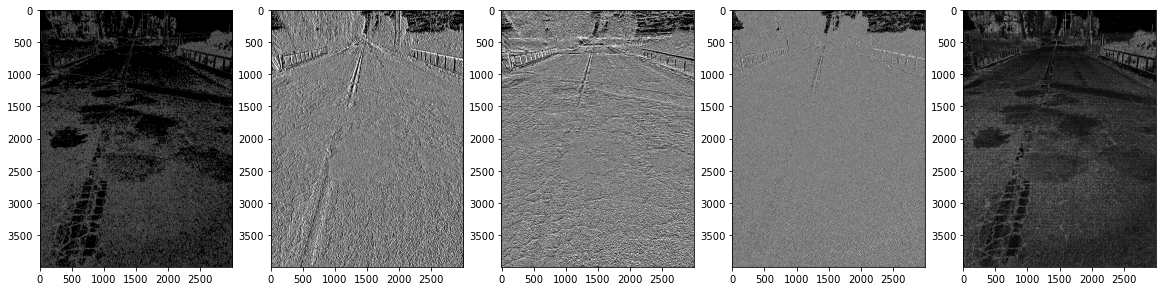

In [26]:

f, ax = plt.subplots(1,5)
f.set_figheight(20)
f.set_figwidth(20)
ax[0].imshow(canny)
ax[1].imshow(sobelx)
ax[2].imshow(sobely)
ax[3].imshow(sobelxy)
ax[4].imshow(laplace)
